In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [6]:
traindf = pd.read_csv("D:\projects\linkedin & github\projects\mnist_dataset\mnist_train.csv")
testdf = pd.read_csv("D:\projects\linkedin & github\projects\mnist_dataset\mnist_test.csv")

In [10]:
#preprocessing

x_train = traindf.drop('label',axis=1).iloc[0:16000,0:16000]
y_train = traindf['label'].iloc[0:16000]
#iloc/loc

x_test = testdf.drop('label',axis=1)
y_test = testdf['label']

print(x_train.shape)
print(x_test.shape)

(16000, 784)
(10000, 784)


enter random number: 7
label : 3


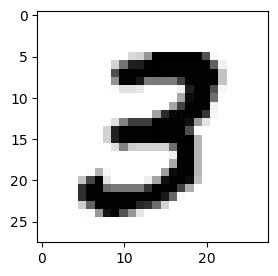

In [17]:
#test image plotting

plt.figure(figsize=(3,3))
random_num= int(input("enter random number: "))
image = x_train.iloc[random_num].to_numpy().reshape(28,28)
plt.imshow(image, cmap=matplotlib.cm.binary)
print("label :",y_train[random_num])

In [18]:
#SVM (Linear)

from sklearn.svm import SVC

svml = SVC(kernel="linear")
svml.fit(x_train, y_train)

pred_svml = svml.predict(x_test)

print("Mean squared error svm(linear): ",mean_squared_error(y_test, pred_svml))
print("Accuracy svm(linear): ",accuracy_score(y_test, pred_svml))

Mean squared error svm(linear):  1.378
Accuracy svm(linear):  0.9174


In [19]:
#SVM (Polynomial)

svmp = SVC(kernel="poly", degree = 2)
svmp.fit(x_train, y_train)

pred_svmp = svmp.predict(x_test)

print("Mean squared error svm(polynomial): ",mean_squared_error(y_test, pred_svmp))
print("Accuracy svm(polynomial): ",accuracy_score(y_test, pred_svmp))

Mean squared error svm(polynomial):  0.7037
Accuracy svm(polynomial):  0.9638


In [20]:
#SVM (rbf)

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(x_train, y_train)

pred_svm_rbf = svm_rbf.predict(x_test)

print("Mean squared error svm(rbf): ",mean_squared_error(y_test, pred_svm_rbf))
print("Accuracy svm(rbf): ",accuracy_score(y_test, pred_svm_rbf))

Mean squared error svm(rbf):  0.6558
Accuracy svm(rbf):  0.9672


In [22]:
#Logistic Regression
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

lr = LogisticRegression()
lr.fit(x_train, y_train)

pred_lr = lr.predict(x_test)

print("Mean squared error Logistic Regression: ",mean_squared_error(y_test, pred_lr))
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, pred_lr))

Mean squared error Logistic Regression:  1.5296
Accuracy of Logistic Regression:  0.9056


In [23]:
#KNN

from sklearn.model_selection import GridSearchCV       #using gridsearchcv to get best value for N hyperparameter tunning
import warnings
from sklearn.neighbors import KNeighborsClassifier

knn_h = KNeighborsClassifier()
knn_h.fit(x_train, y_train)
warnings.filterwarnings('ignore') #to disable printing future warning

parameter_grid = {"n_neighbors" :[2,4,3,7,10,14,11,12,13,15,16,17,18]}
grid = GridSearchCV(knn_h,  parameter_grid, cv = 10, scoring='accuracy',return_train_score = False)
grid.fit(x_train, y_train)

print("Best accuracy found for :",grid.best_params_,"\nAccuracy: ",grid.best_score_)
n = grid.best_params_.get('n_neighbors') #storing best value for n

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

print("Mean squared error KNN: ",mean_squared_error(y_test, pred_knn))
print("Accuracy of KNN: ", accuracy_score(y_test, pred_knn))

Best accuracy found for : {'n_neighbors': 3} 
Accuracy:  0.9516875
Mean squared error KNN:  0.9407
Accuracy of KNN:  0.9537
